Random code, ignore this

In [1]:
import numpy as np
import pandas as pd

In [2]:
from fxvol.strategy import get_pred, run_strategy

In [3]:
from fxvol.data_utils import load_csv, save_csv, make_xy

In [4]:
log_rets = load_csv("processed", "log_returns").dropna()
CURRENCIES = ["AUD", "CHF", "EUR", "GBP", "JPY"]

In [5]:
HORIZON = 5
FEATURE_KWARGS = {"lags": [1, 5, 22, 66], "vol_vol": 22}

In [6]:
data = [(curr,) + make_xy(log_ret=log_rets[curr], horizon=HORIZON, **FEATURE_KWARGS) for curr in CURRENCIES]

In [7]:
from fxvol.baseline_models import naive_fc

In [8]:
pf_ret = run_strategy(data=data,
                      model = (naive_fc, 'naive', {}),
                      horizon=HORIZON,
                      target_vol=0.1,
)

<Axes: xlabel='Date'>

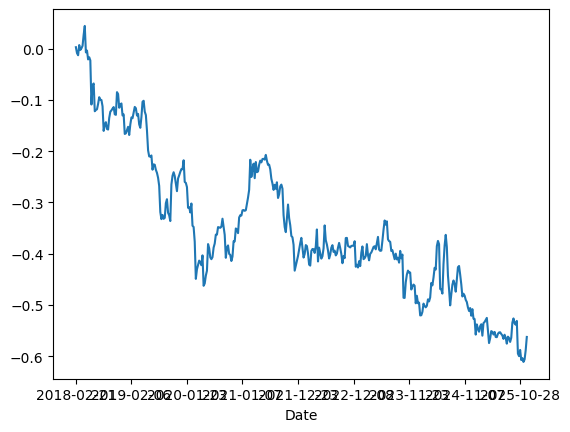

In [10]:
pf_ret.cumsum().plot()

In [ ]:
preds = get_pred(data=data, model=(naive_fc, "naive", {}), horizon=HORIZON)

In [ ]:
log_rets = pd.DataFrame({curr: X["lr"] for curr, X, _ in data})
log_rets = log_rets.loc[preds.index[0]:] # remove burning period
period_log_rets = log_rets.rolling(5).sum() # returns over horizon

# Align
preds = preds.shift(1).iloc[1:]
period_log_rets = period_log_rets.loc[preds.index] # remove intermediate days

In [ ]:
daily_target_vol = 0.1 / np.sqrt(252)
weights = daily_target_vol / (preds * np.sqrt(5))

In [ ]:
preds

In [ ]:
ret_eur = load_csv('results', 'ret_eur')

In [ ]:
total_ret = ret_eur.cumsum()

In [ ]:
total_ret.plot()

In [ ]:
sig = total_ret.std()*np.sqrt(252)/np.sqrt(5)

In [ ]:
mu = total_ret.mean()*np.sqrt(252/5)

In [ ]:
mu/sig

In [ ]:
sig/np.sqrt(252)

In [ ]:
log_rets = load_csv("processed", "log_returns").dropna()
log_ret = log_rets["JPY"]
cs = log_ret.cumsum()

In [ ]:
cs = cs.loc[total_ret.index]
df = pd.DataFrame(index = cs.index, data = {'cs':cs, 'total_ret': total_ret.iloc[:,0]})
df.plot()